# A Visual Exploration of Movie Profit Trends
- Module 1 Project by Charlotte Basch with Rachel Beery
- https://github.com/charlottebasch/A-Visual-Exploration-of-Movie-Profit-Trends

#  Introduction

&nbsp; &nbsp; &nbsp;Before the events of the Coronavirus pandemic, the film industry was a tremendously profitable business. In <a href="https://www.billboard.com/articles/news/8547827/2019-global-box-office-revenue-hit-record-425b-despite-4-percent-dip-in-us#:~:text=Global%20box%20office%20revenue%20hit%20a%20record%20%2442.5%20billion%20in,%2411.88%20billion%2C%20according%20to%20Comscore." target="_blank">2019</a>, global box office revenue reached 42.5 billion dollars. In this project we explored data about movie production from 2010 to 2018 using pandas to work with datasets and make visualizations. This project contains data we were given for the module one project in order to make recommendations to Microsoft if they were considering going into the movie business. We were provided with datasets from IMDB, TMDb, and The Numbers. These datasets provided information on movie titles, years, runtime, genres, budgets, profits, and other related variables. The data also contained audience ratings. We focused on three questions about what factors are related to film grosses. 

## Questions:
- Do IMDB user ratings relate to profit or budget?
- What genres are the most profitable?
- Does runtime affect movie gross?

#  Data Cleaning

We began by combining the datasets in a way that allowed us to answer the questions we intended to explore. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Import data from imdb, tmdb, and tn
pd.set_option("display.max_rows", None, "display.max_columns", None)
imdb_title_basics = pd.read_csv(r"zippedData\imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv(r"zippedData\imdb.title.ratings.csv.gz")
tmdb_movies = pd.read_csv(r"zippedData\tmdb.movies.csv.gz")
tn_movie_budgets = pd.read_csv(r"zippedData\tn.movie_budgets.csv.gz")

## IMDB

In [3]:
display(imdb_title_basics.head(10))

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [4]:
#Fill the missing runtime values with the median to preserve the distriibution of runtimes 
imdb_title_basics["runtime_minutes"] = imdb_title_basics["runtime_minutes"].fillna(imdb_title_basics["runtime_minutes"].median())

#Fill missing values with 'missing' to indicate that they are gone.
imdb_title_basics["genres"] = imdb_title_basics["genres"].fillna("Missing")
imdb_title_basics["original_title"] = imdb_title_basics["original_title"].fillna("Missing")

display(imdb_title_ratings.head(10))

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [5]:
#Join together titles and user ratings on imdb movie id
titles_with_ratings = imdb_title_basics.join(imdb_title_ratings.set_index("tconst"), on="tconst", how="right")

display(titles_with_ratings.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3667,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
4103,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
4721,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
4825,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
5471,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


## TMDb and The Numbers

In [6]:
#Get rid of unamed column 
tmdb_movies = tmdb_movies.drop(columns=["Unnamed: 0"])

#Categorize movies by year instead of date
tmdb_movies["release_date"] = tmdb_movies["release_date"].str[:4]
tn_movie_budgets["release_date"] = tn_movie_budgets["release_date"].str[-4:]

#Rename the title column to aid merging 
tmdb_movies.rename(columns={"title": "movie"}, inplace=True)

display(tmdb_movies.head())
display(tn_movie_budgets.head())

,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
#Join together tmdb genre information with movie budgets based on movie name
budgets_and_ratings = tn_movie_budgets.merge(tmdb_movies, on="movie", how="inner")

#Drop repeated columns
budgets_and_ratings = budgets_and_ratings.drop(columns=["id_x", "id_y", "genre_ids"])

#Make sure movies are correct by matching release year 
budgets_and_ratings = budgets_and_ratings.loc[budgets_and_ratings['release_date_x'] == budgets_and_ratings['release_date_y']]

In [8]:
#Now that we've verified the movies are correct, drop the repeated year column
budgets_and_ratings = budgets_and_ratings.drop(columns=["release_date_y"])

#Rename the remaining year column
budgets_and_ratings.rename(columns={"release_date_x": "year"}, inplace=True)

display(budgets_and_ratings.head())

,year,movie,production_budget,domestic_gross,worldwide_gross,original_language,original_title,popularity,vote_average,vote_count
0,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",en,Avatar,26.526,7.4,18676
1,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571
2,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",en,Avengers: Age of Ultron,44.383,7.3,13457
3,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",en,Avengers: Infinity War,80.773,8.3,13948
4,2017,Justice League,"$300,000,000","$229,024,295","$655,945,209",en,Justice League,34.953,6.2,7510


In [9]:
#Rename column to aid with merging
titles_with_ratings.rename(columns={"original_title": "movie"}, inplace=True)

#Merge budget and genre information with imdb user ratings based on movie title
budgets_and_ratings_with_imdb = budgets_and_ratings.merge(titles_with_ratings, on="movie", how="inner")

#Drop unnecessary columns
budgets_and_ratings_with_imdb = budgets_and_ratings_with_imdb.drop(columns=["tconst"])
budgets_and_ratings_with_imdb.drop_duplicates(keep="first", inplace=True) 

display(budgets_and_ratings_with_imdb.head())

,year,movie,production_budget,domestic_gross,worldwide_gross,original_language,original_title,popularity,vote_average,vote_count,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",en,Avengers: Age of Ultron,44.383,7.3,13457,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",en,Avengers: Infinity War,80.773,8.3,13948,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,2017,Justice League,"$300,000,000","$229,024,295","$655,945,209",en,Justice League,34.953,6.2,7510,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
5,2015,Spectre,"$300,000,000","$200,074,175","$879,620,923",en,Spectre,30.318,6.4,6719,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504


In [10]:
#Make the year a number so it can be compared
budgets_and_ratings_with_imdb = budgets_and_ratings_with_imdb.astype({'year': 'float64'})

#Make sure the years match on movies with the same title
budgets_and_ratings_with_imdb = budgets_and_ratings_with_imdb.loc[budgets_and_ratings_with_imdb['year'] == budgets_and_ratings_with_imdb['start_year']]

#Get rid of all irrelevant columns
budgets_and_ratings_with_imdb = budgets_and_ratings_with_imdb.drop(columns=["start_year", "original_language", 
                                                                            "popularity", "vote_average", "vote_count",
                                                                            "original_title", "primary_title"])

#Make sure only unqiue movies are in the dataset
movies = budgets_and_ratings_with_imdb.drop_duplicates(subset=["year", "movie"], keep="first")

display(movies.head())

,year,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes
0,2011.0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",136.0,"Action,Adventure,Fantasy",6.6,447624
1,2015.0,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,2018.0,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,2017.0,Justice League,"$300,000,000","$229,024,295","$655,945,209",120.0,"Action,Adventure,Fantasy",6.5,329135
5,2015.0,Spectre,"$300,000,000","$200,074,175","$879,620,923",148.0,"Action,Adventure,Thriller",6.8,352504


## Clean the Final Dataset

In order to make visual exploration of our data easier, we must modify the form of some of our final variables.
- Our monetary variables are not in the correct data form and since we are working with such larger amounts of money, our visuals will be more interpretable if we scale down the numbers.
- Right now our movie genres are in a list, but it will be much simpler for each movie to be classified by whether it falls in each genre given that movies can be examples of more than one genre. 

In [11]:
#Change budget, gross, and year data into the correct data form and convert the 
#monetary values them to a measure of 'millions of dollars'
movies = movies.astype({"year": "int32"})
cols = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols:
    movies[col] = movies[col].str[1:]
    movies[col] = movies[col].replace(',','', regex=True)
    movies = movies.astype({col: "float64"})
    movies[col] = movies[col]/1000000

In [12]:
#Create a list of all genres and restructure 
values = movies["genres"].value_counts()
values_list = list(values.index)
genres_list = []
for entry in values_list:
    genres = entry.split(",")
    for genre in genres:
        if genre not in genres_list:
            genres_list.append(genre)

#Create new columns to indicate which genres each movie falls into 
for genre in genres_list:
    movies[genre] = movies["genres"].str.contains(genre)

In [13]:
display(movies.head())

,year,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,Adventure,Animation,Comedy,Drama,Romance,Action,Sci-Fi,Crime,Fantasy,Horror,Mystery,Thriller,Biography,History,Family,Documentary,Sport,Music,War,Western,Musical,Missing
0,2011,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,136.0,"Action,Adventure,Fantasy",6.6,447624,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,Avengers: Age of Ultron,330.6,459.005868,1403.013963,141.0,"Action,Adventure,Sci-Fi",7.3,665594,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2018,Avengers: Infinity War,300.0,678.815482,2048.134200,149.0,"Action,Adventure,Sci-Fi",8.5,670926,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2017,Justice League,300.0,229.024295,655.945209,120.0,"Action,Adventure,Fantasy",6.5,329135,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2015,Spectre,300.0,200.074175,879.620923,148.0,"Action,Adventure,Thriller",6.8,352504,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


#  Questions

## Do IMDB user ratings relate to profit or budget?

While there are certainly benefits to producing a movie people generally enjoy, it is unclear if opt-in online ratings from websites such as IMDB offer any kind of actionable insight into making movies more people will enjoy and therefore pay to see. We looked to see there was any correlation between average IMDB ratings, the number of IMDB ratings for a movie, and its budget or profits. Next we looked at whether there was a graphical relationship between the worldwide gross and average IMDB rating. 

### Correlation

In [14]:
#Get correlations for imdb ratings data and production data
movies_subset = movies[["production_budget", "domestic_gross", 
                "worldwide_gross", "averagerating", "numvotes"]]
corr_subset = movies_subset.copy()
corr = corr_subset.corr()

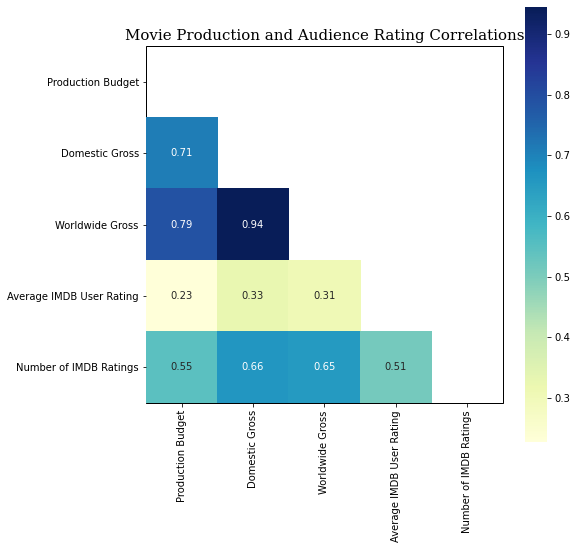

In [15]:
#Create a heatmap to display the correlations 
fig, ax = plt.subplots(figsize=(8,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
labels = ["Production Budget", "Domestic Gross", "Worldwide Gross", "Average IMDB User Rating", 
          "Number of IMDB Ratings"]
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Movie Production and Audience Rating Correlations", fontsize=15, fontfamily="serif");

- As can be reasonably expected, the only strong correlations were between the financial variables.
- There was a moderate correlation between the number of ratings a movie had and its gross. This makes sense as more people saw these movies.
- There is also a moderate correlation between the number of reviews and the budget. Given that a movie's budget is fairly strongly related to the gross, this is again unsurprising.
- The correlations between the average rating and both gross and budget is fairly weak, indicating that these reviews are perhaps not a good predictor of gross. 

### Scatterplot

In [26]:
# answering the question "Does IMDb rating predict profitability?" via scatterplot"

figimdb = px.scatter(movies, x="averagerating", y="worldwide_gross", trendline="lowess",
                    title="Worldwide Grossing by Average IMDb Rating")
figimdb.update_layout(
    title={
        'y': 0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Average IMDb Rating (0-10)",
    yaxis_title="Worldwide Gross Profits (Millions of Dollars)")
figimdb.show()

- While there is a slight positive trend in this data, the wide spread of points does not indicate a clear relationship.
- Most points are fairly low regardless of rating, with a smaller number of movies at the higher ratings with large grosses may explain the small positive relationship.

### Conclusion

- Online rating systems such as IMDB likely do not accurately reflect the viability of a movie.
- This is a small sample of people who chose to rate movies and their enjoyment may not reflect the spending preferences of the general public. 

## What genres are the most profitable?

Genre is undoubtedly an important factor in a movie's profitability. When deciding what type of movies to make, it may be valuable to know which genres tend to make the most money.   

- First we must get the totals and medians for each genre for domestic gross, international gross, and budget. 
- We choose the median to avoid the outsized influence of movie series that generate great sums of money but are not necessarily representative of the genre's earning potential. 

In [17]:
#Get the totals and averages for the financial variables
world_values = [movies[movies[genre] == True]["worldwide_gross"].sum() for genre in genres_list]
dom_values = [movies[movies[genre] == True]["domestic_gross"].sum() for genre in genres_list]
cost_values = [movies[movies[genre] == True]["production_budget"].sum() for genre in genres_list]
cost_medians = [movies[movies[genre] == True]["production_budget"].median() for genre in genres_list]
dom_medians = [movies[movies[genre] == True]["domestic_gross"].median() for genre in genres_list]
world_medians = [movies[movies[genre] == True]["worldwide_gross"].median() for genre in genres_list]

In [18]:
#Create a new dataframe with the total aggregated data and one with the average data
grosses = pd.DataFrame(list(zip(genres_list, cost_values, dom_values, world_values)), 
                       columns=["Genre", "Production Budget", "Domestic Gross", "Worldwide Gross"])
grosses = grosses.sort_values(by="Domestic Gross", ascending=False)

medians = pd.DataFrame(list(zip(genres_list, cost_medians, dom_medians, world_medians)), 
                       columns=["Genre", "Production Budget", "Domestic Gross", "Worldwide Gross"])
medians = medians.sort_values(by="Worldwide Gross", ascending=False)

#View the new dataframes
print("Total Gross by Genre")
display(grosses.head())
print("Median gross by genre")
display(medians.head())

Total Gross by Genre


,Genre,Production Budget,Domestic Gross,Worldwide Gross
0,Adventure,34544.80000,40823.828115,115871.956349
5,Action,32782.37500,36180.252929,99485.211179
2,Comedy,19553.46000,28993.344986,65995.967513
3,Drama,18213.93465,23197.317255,50909.375069
6,Sci-Fi,11302.90000,15046.864061,41657.316177


Median gross by genre


,Genre,Production Budget,Domestic Gross,Worldwide Gross
1,Animation,90.0,123.087120,333.771037
0,Adventure,100.0,84.719286,251.888296
6,Sci-Fi,66.5,70.525647,220.165751
5,Action,60.0,47.059963,130.673154
8,Fantasy,60.0,40.479370,97.799865


## Median Gross by Genre

- We start by looking at the median domestic and international gross for each genre. 

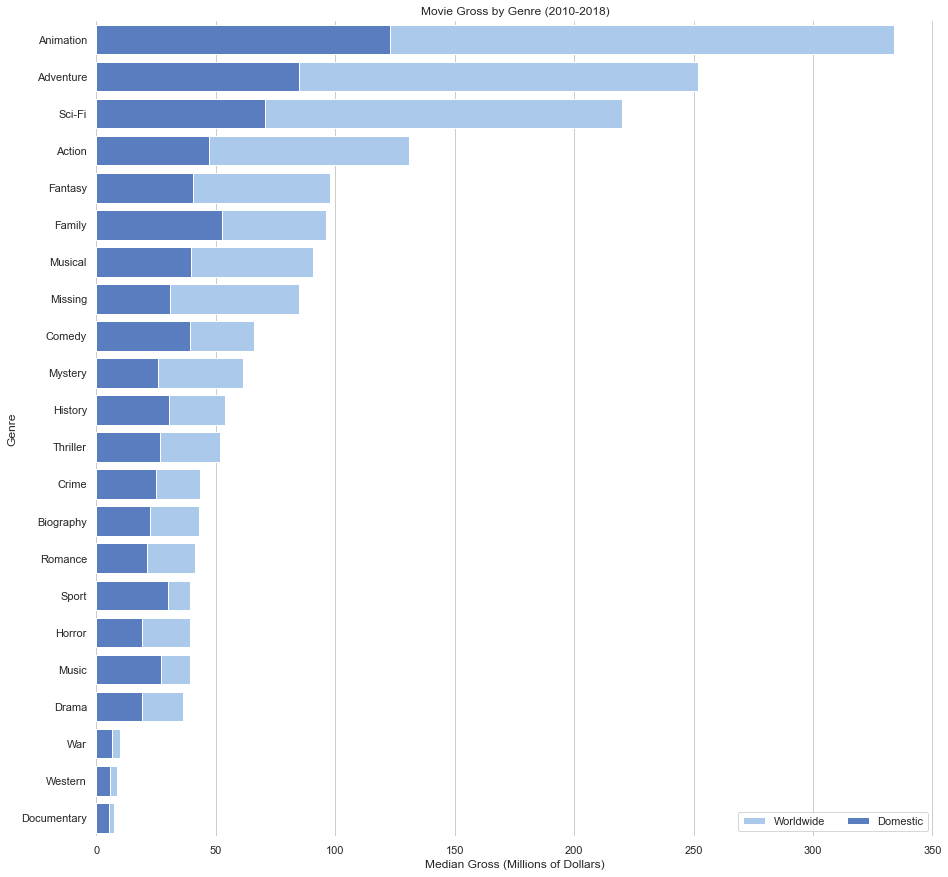

In [19]:
#Create a horizontal barplot of average domestic and worldwide gross by genre
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize = (15,15))
sns.set_color_codes("pastel")
sns.barplot(x="Worldwide Gross", y="Genre", data=medians, label="Worldwide", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Domestic Gross", y="Genre", data=medians, label="Domestic", color="b")
ax.legend(ncol=2, loc="lower right")
ax.set(ylabel="Genre", xlabel="Median Gross (Millions of Dollars)", title="Movie Gross by Genre (2010-2018)")
sns.despine(left=True, bottom=True)
plt.show()

- Animation, adventure, and sci-fi movies have the highest median gross both domestically and internationally indicating that these genres retain great popularity across culture. 

## Yearly Gross

- While the visual above is very compelling, it is important to look at each genre over time to make sure these top genres are not on the downswing. 
- Therefore we will get the total gross for each 

In [20]:
#Get a list of all years
years = list(movies["year"].value_counts().index)

#Sort the years
years.sort()

#Generate the total by genre for each year
genre_cols = []
year_cols = []
yearly_total_cols = []
for genre in genres_list:
    for year in years:
        #We 
        yearly_total = movies[(movies[genre] == True) & (movies["year"] == year)]["worldwide_gross"].sum()
        genre_cols.append(genre)
        year_cols.append(year)
        yearly_total_cols.append(yearly_total)

#Create a new dataframe based on the yearly data
yearly_gross = pd.DataFrame(list(zip(genre_cols, year_cols, yearly_total_cols)), 
                                columns=["Genre", "Year", "Yearly Gross"])

display(yearly_gross.head())

,Genre,Year,Yearly Gross
0,Adventure,2010,11008.813981
1,Adventure,2011,9488.833668
2,Adventure,2012,12990.705047
3,Adventure,2013,12833.751504
4,Adventure,2014,14865.181703


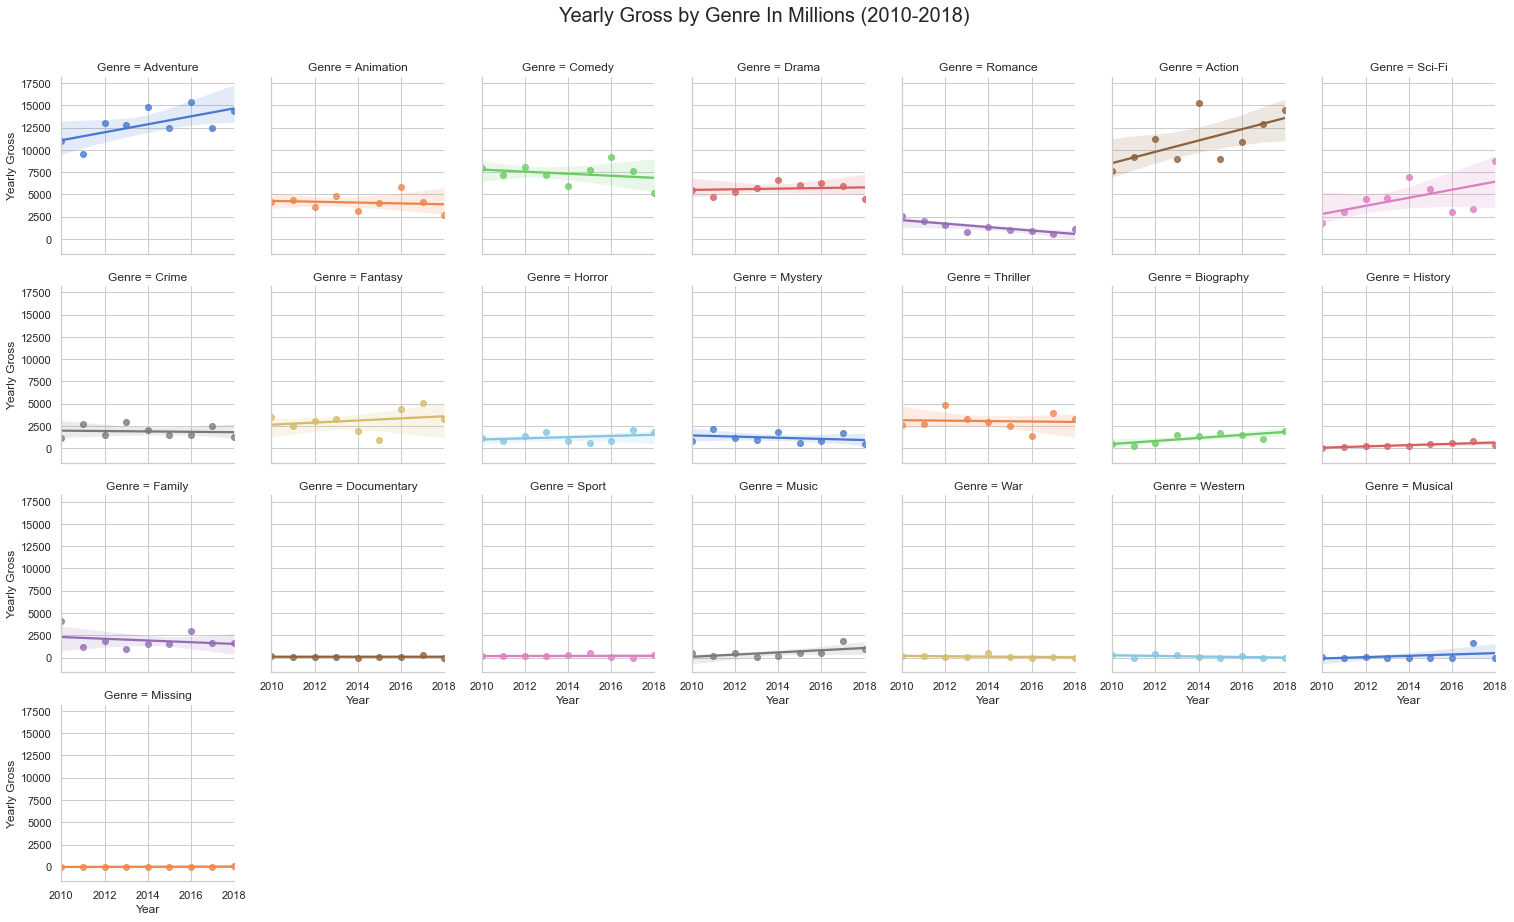

In [21]:
#Create a plot for each genre showing yearly gross for the stated years
g = sns.lmplot(x="Year", y="Yearly Gross", col="Genre", hue="Genre", data=yearly_gross,
           col_wrap=7, palette="muted", height=3)
fig = g.fig
axes = fig.get_axes()
fig.suptitle("Yearly Gross by Genre In Millions (2010-2018)", y=1.05, fontsize=20);

- Action, adventure, and sci-fi are the genres most on the rise, possibly owing to the rise of franchises such as the Marvel Cinematic Universe and the Hunger Games during this time period.  

## Number of Movies Made by Genre

- We can also examine the cost and profit of genres in relation to how many movies of each type were made. 

In [22]:
#Count the number of movies of each type
counts = []
for genre in genres_list:
    counts.append(movies[genre].value_counts().loc[True])

#Add the counts to the grosses dataframe
grosses["Number of Movies"] = counts

display(grosses.head())

,Genre,Production Budget,Domestic Gross,Worldwide Gross,Number of Movies
0,Adventure,34544.80000,40823.828115,115871.956349,320
5,Action,32782.37500,36180.252929,99485.211179,93
2,Comedy,19553.46000,28993.344986,65995.967513,467
3,Drama,18213.93465,23197.317255,50909.375069,655
6,Sci-Fi,11302.90000,15046.864061,41657.316177,172


In [23]:
#Create a scatterplot compairing budget and worldwide gross by genre, displaying 
#the number of movies of each genre that were made
fig = px.scatter(grosses, x="Production Budget", y="Worldwide Gross",
                 size="Number of Movies", color="Genre",
                 hover_name="Genre", log_x=True, size_max=60)
fig.update_layout(
    title={
        'text': "Number of Movies per Genre",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Production Budget (Millions of Dollars)",
    yaxis_title="Worldwide Gross (Millions of Dollars)")
fig.show()

## Conclusion

 - Making action, adventure, animation, and sci-fi movies increases the likelihood of making large profits. However multiple other genres are also continuing to bring in impressive box offices. 
 - Certain genres, such as sci-fi can make similar profits and use similar budgets as other genres, such as animation, while making fewer movies. 
 - While we cannot choose one strategy as superior, it is worth considering whether money should be put towards a few films or many. 

## Does runtime affect movie gross?

Text(0.5, 1.05, 'Gross by Runtime')

<Figure size 720x576 with 0 Axes>

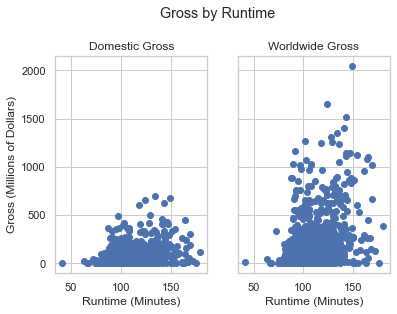

In [24]:
#Create a scatterplot for runtime versus domestic and international gross
plt.figure(figsize=(10, 8))
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey=True)
ax1.scatter(movies["runtime_minutes"], movies["domestic_gross"])
ax1.set(title="Domestic Gross", xlabel="Runtime (Minutes)", ylabel="Domestic Gross (Millions of Dollars)")
ax2.scatter(movies["runtime_minutes"], movies["worldwide_gross"])
ax1.set(title="Domestic Gross", xlabel="Runtime (Minutes)", ylabel="Gross (Millions of Dollars)")
ax2.set(title="Worldwide Gross", xlabel= "Runtime (Minutes)")
fig.suptitle("Gross by Runtime", y=1.05)

Recommendation: Once runtime hits approximately 75 minutes, it is not an important predictor of profit.

# Conclusion

- Online rating should not be used when making decisions about budget or to predict profit. 
- Action, animation, sci-fi, and adventure movies are the most profitable genres. However smaller grossing genres still make a lot of profit. Additionally, many of these genres overlap so the profits observed are not completely additive. 
- Runtime is not related to movie gross unless it is unusually short. 

The movie business continues to expand and by examining the data and isolating the relevant factors, Microsoft would be able to maximize their profits in this kind of endeavor. 